In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import trange
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [6]:
train = pd.read_csv("training_data_final.csv")
test = pd.read_csv("test_data_final.csv")

In [7]:
train.head()


,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment
0,1,enalapril,management of congestive heart failure,4,3.333333,8,0.0,10,5.000000,2.000000
1,2,ortho-tri-cyclen,birth prevention,1,5.000000,4,7.5,10,7.500000,6.666667
2,3,ponstel,menstrual cramps,10,6.000000,10,0.0,10,4.000000,4.545455
3,4,prilosec,acid reflux,3,5.700265,8,0.0,4,3.333333,2.500000
4,5,lyrica,fibromyalgia,2,5.700265,4,0.0,4,5.000000,2.500000


In [8]:
test.head()

,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment
0,1,biaxin,sinus infection,9,5.000000,8,0.000000,8,0.000000,1.666667
1,2,lamictal,bipolar disorder,9,5.000000,8,4.000000,10,6.153846,4.800000
2,3,depakene,bipolar disorder,4,2.941176,4,3.750000,6,6.666667,4.242424
3,4,sarafem,bi-polar / anxiety,10,10.000000,10,3.502362,10,5.000000,6.666667
4,5,accutane,nodular acne,10,10.000000,8,10.000000,10,6.666667,8.333333


In [9]:
le = preprocessing.LabelEncoder() #transforming string conditions to numeric ones

In [10]:
le2 = preprocessing.LabelEncoder()

In [11]:
train['condition'] = train['condition'].astype(str)

In [12]:
test['condition'] = test['condition'].astype(str)

In [13]:
le.fit(train['condition']) 

LabelEncoder()

In [14]:
le2.fit(test['condition'])

LabelEncoder()

In [15]:
train['condition'] = le.transform(train['condition']) 

In [16]:
test['condition'] = le2.transform(test['condition']) 

In [17]:
X = train[["SideEffectsSentiment", "BenefitsSentiment", "ReviewSentiment", "full_commentSentiment", 'condition']]
Y = train["rating"] 
X_test = test[["SideEffectsSentiment", "BenefitsSentiment", "ReviewSentiment", "full_commentSentiment", 'condition']]
Y_test = test["rating"] 

# Decision tree regressor

In [18]:
best_score = np.inf
parameters = {} 

In [19]:
from sklearn.tree import DecisionTreeRegressor

for depth in range (1,11):
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            regressor = DecisionTreeRegressor(max_depth = depth,
                                              min_samples_split = min_split,
                                              min_samples_leaf = min_leaf)
            scores = cross_val_score(regressor, X, Y, cv = 5)
            print("MSE: {} (std {})".format(scores.mean(), scores.std()))
            if scores.mean() < 0:
                pass
            elif scores.mean() < best_score:
                print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split             
                parameters["best_min_leaf"] = min_leaf
                best_score = scores.mean()

MSE: 0.021783742279174213 (std 0.008173960129332247)
New best parameters!
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213

MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.0081739601293

MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.008173960129332247)
MSE: 0.021783742279174213 (std 0.0081739601293

MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411

MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411083185465206 (std 0.024591962371173934)
MSE: 0.05411

MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07410975429834321 (std 0.02732389998752386)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043

MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07410975429834321 (std 0.02732389998752386)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043

MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07410975429834321 (std 0.02732389998752386)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07338525285193773 (std 0.02806477456551641)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043998 (std 0.027302482663709098)
MSE: 0.07413155929043

MSE: 0.08658328941241825 (std 0.028370701241853036)
MSE: 0.08658328941241825 (std 0.028370701241853036)
MSE: 0.086828924697912 (std 0.027999835010283216)
MSE: 0.08696529214138451 (std 0.028169046801947817)
MSE: 0.08739182580917779 (std 0.028614638830931002)
MSE: 0.08568046303367834 (std 0.03128484081223768)
MSE: 0.0858579040284246 (std 0.03133934843855347)
MSE: 0.0860305046461524 (std 0.031066250812244664)
MSE: 0.07824434330108283 (std 0.034107435935097394)
MSE: 0.07892520197065109 (std 0.035018762196798905)
MSE: 0.07892520197065109 (std 0.035018762196798905)
MSE: 0.07892520197065109 (std 0.035018762196798905)
MSE: 0.07867373754961113 (std 0.03484142213496223)
MSE: 0.08321485127713468 (std 0.029541362796974217)
MSE: 0.08452875620062501 (std 0.027745523281627334)
MSE: 0.08465477110121275 (std 0.027891407423279974)
MSE: 0.08399533957225629 (std 0.028831467722930843)
MSE: 0.0829675253256215 (std 0.03000162577554014)
MSE: 0.08310290655241129 (std 0.029954588015365546)
MSE: 0.08420081642647

MSE: 0.08696529214138451 (std 0.028169046801947817)
MSE: 0.08739182580917779 (std 0.028614638830931002)
MSE: 0.08568046303367834 (std 0.03128484081223768)
MSE: 0.0858579040284246 (std 0.03133934843855347)
MSE: 0.0860305046461524 (std 0.031066250812244664)
MSE: 0.07825970463601109 (std 0.034090833956712766)
MSE: 0.07894056330557934 (std 0.03500229366480453)
MSE: 0.07894056330557934 (std 0.03500229366480453)
MSE: 0.07894056330557934 (std 0.03500229366480453)
MSE: 0.07867252576380937 (std 0.03484271706868133)
MSE: 0.08321485127713468 (std 0.029541362796974217)
MSE: 0.08452875620062501 (std 0.027745523281627334)
MSE: 0.08465477110121275 (std 0.027891407423279974)
MSE: 0.08399533957225629 (std 0.028831467722930843)
MSE: 0.0829675253256215 (std 0.03000162577554014)
MSE: 0.08310290655241129 (std 0.029954588015365546)
MSE: 0.08420081642647563 (std 0.02947257528981137)
MSE: 0.08658328941241825 (std 0.028370701241853036)
MSE: 0.08658328941241825 (std 0.028370701241853036)
MSE: 0.086828924697912 

MSE: 0.08185093128853285 (std 0.03715207347186021)
MSE: 0.06448713259816588 (std 0.037700689022388996)
MSE: 0.067019487218546 (std 0.041414649923183305)
MSE: 0.07132574724526038 (std 0.045188235690811464)
MSE: 0.07435072528847679 (std 0.04198109365190044)
MSE: 0.07419236389522588 (std 0.04131564909947414)
MSE: 0.07531734459418404 (std 0.03232858538180903)
MSE: 0.07565717864293586 (std 0.03173045257757678)
MSE: 0.07694609697373159 (std 0.031540892491019934)
MSE: 0.0759352600178808 (std 0.03069963007502247)
MSE: 0.07337417954393541 (std 0.032147928034117645)
MSE: 0.07376805173352215 (std 0.0318923741717056)
MSE: 0.07683016913699096 (std 0.03307622622567766)
MSE: 0.08210430769617945 (std 0.028225330503439987)
MSE: 0.0847961292510964 (std 0.025897514485325217)
MSE: 0.08680746011135913 (std 0.025029379477992702)
MSE: 0.08623868596877407 (std 0.025049719247410958)
MSE: 0.08659479501234242 (std 0.025272313445548544)
MSE: 0.08129479668554426 (std 0.03515904969381716)
MSE: 0.08212333948567829 (

MSE: 0.06748106694385081 (std 0.032721210175849516)
MSE: 0.07001342156423092 (std 0.03577246510012556)
MSE: 0.07431968159094524 (std 0.039747327187733814)
MSE: 0.07413018154970982 (std 0.0399857518015924)
MSE: 0.07353125191138496 (std 0.04071681243289218)
MSE: 0.07531734459418404 (std 0.03232858538180903)
MSE: 0.07565717864293586 (std 0.03173045257757678)
MSE: 0.07694609697373159 (std 0.031540892491019934)
MSE: 0.0759352600178808 (std 0.03069963007502247)
MSE: 0.07337417954393541 (std 0.032147928034117645)
MSE: 0.07376805173352215 (std 0.0318923741717056)
MSE: 0.07683016913699096 (std 0.03307622622567766)
MSE: 0.08210430769617945 (std 0.028225330503439987)
MSE: 0.0847961292510964 (std 0.025897514485325217)
MSE: 0.08680746011135913 (std 0.025029379477992702)
MSE: 0.08623868596877407 (std 0.025049719247410958)
MSE: 0.08659479501234242 (std 0.025272313445548544)
MSE: 0.08129479668554426 (std 0.03515904969381716)
MSE: 0.08212333948567829 (std 0.03770049790561747)
MSE: 0.08185093128853285 (

MSE: 0.049300985101825436 (std 0.04124034761629506)
MSE: 0.05554551863021995 (std 0.04422651230449577)
MSE: 0.05385975837324397 (std 0.04558820191035925)
MSE: 0.052573477941898414 (std 0.043883151977394244)
MSE: 0.054054205252790456 (std 0.04322094389680835)
MSE: 0.05665094411712777 (std 0.035667753467726875)
MSE: 0.05310239364060987 (std 0.03601898845025174)
MSE: 0.056905591351135466 (std 0.03544274597056021)
MSE: 0.057610205301142935 (std 0.03327221786172766)
MSE: 0.05539689563131676 (std 0.029701697657387345)
MSE: 0.05777768844042221 (std 0.02978889020071235)
MSE: 0.0616683942506324 (std 0.028700822266671727)
MSE: 0.0613894117458537 (std 0.02732513155396583)
MSE: 0.06390417540507307 (std 0.022226025472246308)
MSE: 0.07115414150850279 (std 0.02461063332355024)
MSE: 0.07297518811711264 (std 0.024657317656461824)
MSE: 0.0686375494143392 (std 0.023700130408453816)
MSE: 0.06700229703087406 (std 0.03586503936131079)
MSE: 0.06948933297329478 (std 0.03720364783238764)
MSE: 0.067530725950494

MSE: 0.05315913094105677 (std 0.035655933237323086)
MSE: 0.05929056102825121 (std 0.04147708618211032)
MSE: 0.05872073788177605 (std 0.042457684569743664)
MSE: 0.057486250973716777 (std 0.042457944626079734)
MSE: 0.05409545088488223 (std 0.04330857355723581)
MSE: 0.056605370898095385 (std 0.035651293526481706)
MSE: 0.05353891085130065 (std 0.03627254550116812)
MSE: 0.056574254632732045 (std 0.035036765876683335)
MSE: 0.05755714240586749 (std 0.033243070758124285)
MSE: 0.05534383273604131 (std 0.029655617736910927)
MSE: 0.05777768844042221 (std 0.02978889020071235)
MSE: 0.06161533135535695 (std 0.028645885603634645)
MSE: 0.0613894117458537 (std 0.02732513155396583)
MSE: 0.0642623289841858 (std 0.022452330546188417)
MSE: 0.07120720440377826 (std 0.024640826624217155)
MSE: 0.07297518811711264 (std 0.024657317656461824)
MSE: 0.0686375494143392 (std 0.023700130408453816)
MSE: 0.06712276489168297 (std 0.03598546401873565)
MSE: 0.06948933297329478 (std 0.03720364783238764)
MSE: 0.067649583193

MSE: 0.05664614663183702 (std 0.04081598115671851)
MSE: 0.058135181164856074 (std 0.03982686971069084)
MSE: 0.05765706284794932 (std 0.03900529915950848)
MSE: 0.05399535139521883 (std 0.03995074587178876)
MSE: 0.05679205136730274 (std 0.035447419465385335)
MSE: 0.056074524183155394 (std 0.03616080023800218)
MSE: 0.057729831362629325 (std 0.036205977132525734)
MSE: 0.057582332698241465 (std 0.03325137890949451)
MSE: 0.05534383273604131 (std 0.029655617736910927)
MSE: 0.05772462554514681 (std 0.029742070133337285)
MSE: 0.06161533135535695 (std 0.028645885603634645)
MSE: 0.0613363488505783 (std 0.027276663859957247)
MSE: 0.0642623289841858 (std 0.022452330546188417)
MSE: 0.07120720440377826 (std 0.024640826624217155)
MSE: 0.07291852284579572 (std 0.024633744131882563)
MSE: 0.0686375494143392 (std 0.023700130408453816)
MSE: 0.06712276489168297 (std 0.03598546401873565)
MSE: 0.06934232947279424 (std 0.03705226954842929)
MSE: 0.06753072595049417 (std 0.039879657608706084)
MSE: 0.051736031989

MSE: 0.021782691387206364 (std 0.05575592367813532)
MSE: 0.025934035276366597 (std 0.04872523530387167)
MSE: 0.03260247184616079 (std 0.043698733032382725)
MSE: 0.03108851720427421 (std 0.04192652388285509)
MSE: 0.03345776017883286 (std 0.041610697811091474)
MSE: 0.03598487764456728 (std 0.03224949064878578)
MSE: 0.03488891685812327 (std 0.026063202780062526)
MSE: 0.04124268467430947 (std 0.026799512639180487)
MSE: 0.046879906602163124 (std 0.025966976722675856)
MSE: 0.044176902462343424 (std 0.024859198775602945)
MSE: 0.04830178851212532 (std 0.01731339600881821)
MSE: 0.05658971949558504 (std 0.023910851674027477)
MSE: 0.059299896796908835 (std 0.023274933334186756)
MSE: 0.06286994052275234 (std 0.022426133784231427)
MSE: 0.05912996383686031 (std 0.03273249627778831)
MSE: 0.062456600613285465 (std 0.03645775811332172)
MSE: 0.05734089089967649 (std 0.04016323426905183)
MSE: 0.020839721781148658 (std 0.04709198736065748)
MSE: 0.026058922168128284 (std 0.04965197677719892)
MSE: 0.0208663

MSE: 0.025476653447840426 (std 0.05118363808270226)
MSE: 0.030085688829907718 (std 0.048815512840442235)
MSE: 0.03382477236255441 (std 0.0429363565954605)
MSE: 0.03181980288309105 (std 0.042396181458887766)
MSE: 0.03341867943768784 (std 0.04156234350802463)
MSE: 0.03627724478565395 (std 0.032713314312539786)
MSE: 0.034955533034807605 (std 0.02595839034805729)
MSE: 0.04110991720041233 (std 0.02670554032329112)
MSE: 0.04695092252706758 (std 0.026050977623230512)
MSE: 0.04407605800104808 (std 0.024815718255445773)
MSE: 0.04830178851212532 (std 0.01731339600881821)
MSE: 0.05658971949558504 (std 0.023910851674027477)
MSE: 0.05946124001845967 (std 0.023397052781102046)
MSE: 0.06168433118771564 (std 0.024553309631383413)
MSE: 0.05942669375113983 (std 0.03310400511013465)
MSE: 0.06230959711278494 (std 0.036263900317463765)
MSE: 0.05734089089967649 (std 0.04016323426905183)
MSE: 0.03089156407653666 (std 0.04438375945751074)
MSE: 0.029618874191452038 (std 0.045029479968025456)
MSE: 0.02869301768

MSE: -0.030994677818101658 (std 0.04725368329104799)
MSE: -0.02395865888845794 (std 0.03496169517946081)
MSE: -0.00814318215069636 (std 0.03825683864957141)
MSE: -0.007999768091641424 (std 0.03382592686001428)
MSE: -0.0032999272385860977 (std 0.03105148694295873)
MSE: 0.0016270748987764927 (std 0.01994071101996766)
MSE: 0.005489330512200486 (std 0.018605348060058806)
MSE: 0.0161757821411322 (std 0.012285501817897245)
MSE: 0.029128612836886236 (std 0.022928649302695902)
MSE: 0.02814685554275691 (std 0.024352472467776172)
MSE: 0.03451692317850461 (std 0.02063938730778053)
MSE: 0.04279562680118336 (std 0.02795723396756527)
MSE: 0.047120261255999815 (std 0.029629010167938365)
MSE: 0.05419596145466028 (std 0.02306310876406961)
MSE: 0.04646423276859213 (std 0.031542705734219315)
MSE: 0.04657979148141189 (std 0.03553888747929717)
MSE: 0.04183556944648357 (std 0.03876830110924346)
MSE: -0.03579368373637217 (std 0.06376129443561156)
MSE: -0.03441668845794947 (std 0.056394698364971)
MSE: -0.0374

MSE: -0.011194796201451562 (std 0.05083694708531011)
MSE: -0.010382343384933868 (std 0.04557427082516494)
MSE: -0.018738103388469485 (std 0.041319427627152315)
MSE: -0.019090846406488417 (std 0.03980889755278572)
MSE: -0.019282062469476967 (std 0.037619926887366366)
MSE: -0.0094063715404747 (std 0.036499865619945254)
MSE: -0.007595998893305066 (std 0.03379061755932471)
MSE: -0.002957929029564954 (std 0.031463303612788554)
MSE: 0.001577403899729158 (std 0.019867479085235857)
MSE: 0.005351836209876404 (std 0.018073100146359312)
MSE: 0.016184209163142026 (std 0.012083568566728065)
MSE: 0.02853633940124156 (std 0.022880537543476825)
MSE: 0.028153014376911933 (std 0.02432725928878746)
MSE: 0.03471623441953246 (std 0.02056189035757333)
MSE: 0.043141532005500416 (std 0.025556596466914827)
MSE: 0.04684012691057684 (std 0.029220438395590784)
MSE: 0.05464336330844373 (std 0.020423542254489866)
MSE: 0.04602275520161834 (std 0.03095776838785127)
MSE: 0.04683681622174962 (std 0.03602028620172807)
M

MSE: 0.04683681622174962 (std 0.03602028620172807)
MSE: 0.0419544266898421 (std 0.03860171129750255)
MSE: -0.12044605823563406 (std 0.07554756991232156)
MSE: -0.08673241822580482 (std 0.05090661524934433)
MSE: -0.09202492830220428 (std 0.046166007752584004)
MSE: -0.07694550649398531 (std 0.05019211348732112)
MSE: -0.0641468448427304 (std 0.04083293181829711)
MSE: -0.04211686153395311 (std 0.04006107923213438)
MSE: -0.03619272522407328 (std 0.046333083320185896)
MSE: -0.0323007807707318 (std 0.037955287030184956)
MSE: -0.02373222372812218 (std 0.02383649573777937)
MSE: -0.014509869751284788 (std 0.02449195262436669)
MSE: -0.008275570748561112 (std 0.02468860425217081)
MSE: 0.0019660435323668015 (std 0.03440100431151056)
MSE: 0.012890497950427005 (std 0.02870146192846412)
MSE: 0.020292028831721542 (std 0.02328228934090672)
MSE: 0.031121333646862915 (std 0.029450553327364074)
MSE: 0.044546834377295674 (std 0.028358102091187835)
MSE: 0.05239292686623209 (std 0.020251469693640178)
MSE: 0.04

MSE: 0.04357805157326986 (std 0.027633368136463943)
MSE: 0.05253767451892637 (std 0.020211640565456806)
MSE: 0.048460481110078966 (std 0.030229849505138597)
MSE: 0.046721251754461644 (std 0.03319322170808431)
MSE: 0.043313420420432916 (std 0.036521989855430044)
MSE: -0.06315961193465587 (std 0.06000511504587326)
MSE: -0.05568383668993089 (std 0.051256306249120656)
MSE: -0.06647299978808226 (std 0.04475403286823376)
MSE: -0.07492736764987788 (std 0.0466571187904086)
MSE: -0.06798081135579577 (std 0.04274362134686425)
MSE: -0.04233273113525728 (std 0.04307152027718255)
MSE: -0.03552921997638423 (std 0.04611929714519978)
MSE: -0.03021448177749817 (std 0.03505999752453079)
MSE: -0.0270184037842355 (std 0.02637024310110848)
MSE: -0.013829282709320333 (std 0.025091919630093277)
MSE: -0.008275570748561112 (std 0.02468860425217081)
MSE: 0.006049116657484399 (std 0.03121461025039522)
MSE: 0.013445111262774279 (std 0.029203110670599604)
MSE: 0.02307381485282396 (std 0.020648339820186577)
MSE: 0.

MSE: 0.05101557997858437 (std 0.022079345021732075)
MSE: 0.04834001324927002 (std 0.030102854618571793)
MSE: 0.04642677768798838 (std 0.03294126458669734)
MSE: 0.04375489798740673 (std 0.03690985974263473)
MSE: -0.02702540290430342 (std 0.043077041148046856)
MSE: -0.03493950879925012 (std 0.03805545994277854)
MSE: -0.040401247793064664 (std 0.03332027311104699)
MSE: -0.041586889168224506 (std 0.03951828182272319)
MSE: -0.04218251741412762 (std 0.04286461215652627)
MSE: -0.03575405104494254 (std 0.04262565401054288)
MSE: -0.030623812044589683 (std 0.04249124253234721)
MSE: -0.029980727612555925 (std 0.03831789726517556)
MSE: -0.025110011691139487 (std 0.02735944154240868)
MSE: -0.012268182847885 (std 0.022218225925946865)
MSE: -0.007873366566607198 (std 0.02502092522544991)
MSE: 0.0019463286011590197 (std 0.03437424573348047)
MSE: 0.012896656784582095 (std 0.028650999509287085)
MSE: 0.023481263667878616 (std 0.02108402578401096)
MSE: 0.03179004439934778 (std 0.030184804927733837)
MSE: 0

MSE: 0.04337326281765004 (std 0.03058421111770436)
MSE: 0.04114199821727897 (std 0.03290280270501383)
MSE: 0.03885485204950001 (std 0.03712649158692316)
MSE: -0.12483654536282134 (std 0.07507895609098282)
MSE: -0.12782382361127942 (std 0.0633674204094681)
MSE: -0.12846005583365874 (std 0.04545916120397931)
MSE: -0.12019039779690713 (std 0.054137589968949656)
MSE: -0.10433192075657649 (std 0.047850503986720305)
MSE: -0.0852706090269852 (std 0.04071998703006021)
MSE: -0.06367287170875884 (std 0.05189353646922107)
MSE: -0.053806544078361385 (std 0.045070615165879034)
MSE: -0.04600996223435929 (std 0.03586456306160507)
MSE: -0.03199779076749139 (std 0.029749136593517248)
MSE: -0.02557801662068071 (std 0.026694900562377704)
MSE: -0.010673881678100882 (std 0.034358199964557065)
MSE: 0.0017100794357976837 (std 0.02802314157556788)
MSE: 0.01313371908390537 (std 0.024319825356578235)
MSE: 0.024470565850106873 (std 0.028638107848860814)
MSE: 0.03829242781130178 (std 0.028003943744490875)
MSE: 0.

MSE: 0.043638478331153266 (std 0.030698654855784734)
MSE: 0.04095754539064289 (std 0.03276359454757659)
MSE: 0.03917747237311529 (std 0.03763876296162614)
MSE: -0.0782749374492053 (std 0.05211783123106517)
MSE: -0.08881456493063249 (std 0.046295009693206116)
MSE: -0.09308899611241742 (std 0.03725667014526272)
MSE: -0.09336410262389072 (std 0.044672464870568286)
MSE: -0.08878171295120021 (std 0.04875508471379986)
MSE: -0.07865058748833839 (std 0.039573795173895074)
MSE: -0.061547191399727176 (std 0.053551177767768326)
MSE: -0.052746911622014434 (std 0.0471820615670928)
MSE: -0.04698558936097992 (std 0.03540748697139713)
MSE: -0.03242503371963636 (std 0.029609700661270742)
MSE: -0.02494029469604737 (std 0.02694811147511875)
MSE: -0.007268599676178211 (std 0.030731090971897863)
MSE: 0.0023166506755442746 (std 0.02854353315003701)
MSE: 0.015350253469999808 (std 0.022246819335179885)
MSE: 0.025740955174871405 (std 0.027911591291200966)
MSE: 0.0398652435566134 (std 0.026554277671491405)
MSE:

In [20]:
regressor_tree = DecisionTreeRegressor(max_depth = parameters["best_depth"],
                                  min_samples_split = parameters["best_min_split"],
                                  min_samples_leaf = parameters["best_min_leaf"])

In [22]:
regressor_tree.fit(X = X, y = Y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=9,
           min_samples_split=11, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
prediction_tree = regressor_tree.predict(X_test)

In [24]:
results = pd.DataFrame({"y_true":Y_test, "y_pred": prediction_tree})

In [26]:
def rmsle(y_pred, y_true) :
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_true))**2))

In [27]:
rmsle(y_pred=prediction_tree, y_true=Y_test)

0.5672451739558482

# Random Forest regressor

In [28]:
regressor = RandomForestRegressor()


In [29]:
regressor.fit(X = X, y = Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
prediction = regressor.predict(X_test)

In [31]:
results = pd.DataFrame({"y_true":Y_test, "y_pred": prediction})

In [32]:
results

,y_pred,y_true
0,3.400000,9
1,4.500000,9
2,7.200000,4
3,8.100000,10
4,7.200000,10
5,6.300000,2
6,3.700000,8
7,7.800000,10
8,4.500000,10
9,8.100000,1


In [33]:
rmsle(y_pred=prediction, y_true=Y_test)


0.563265672549523

# TPOT Regressor

In [34]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)

In [35]:
tpot.fit(X, Y)

Optimization Progress:  33%|███▎      | 100/300 [02:04<09:51,  2.96s/pipeline]

Generation 1 - Current best internal CV score: -7.5807112804880195


Optimization Progress:  50%|█████     | 150/300 [03:55<02:32,  1.02s/pipeline]

Generation 2 - Current best internal CV score: -7.558544662802485


Optimization Progress:  67%|██████▋   | 200/300 [06:08<04:43,  2.83s/pipeline]

Generation 3 - Current best internal CV score: -7.558544662802485


Optimization Progress:  83%|████████▎ | 250/300 [08:10<02:22,  2.86s/pipeline]

Generation 4 - Current best internal CV score: -7.558544662802485


Generation 5 - Current best internal CV score: -7.558544662802485

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.55, min_samples_leaf=11, min_samples_split=2, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=5, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
       offspring_size=50, periodic_checkpoint_folder=None,
       population_size=50, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

In [36]:
print(tpot.score(X, Y))


-6.13812251904607


In [37]:
tpot.export('tpot_pipeline.py')


True

In [38]:
prediction2 = tpot.predict(X_test)

In [39]:
results2 = pd.DataFrame({"y_true":Y_test, "y_pred": prediction2})

In [40]:
results2

,y_pred,y_true
0,5.891171,9
1,6.596388,9
2,6.653877,4
3,7.366649,10
4,7.743116,10
5,7.520429,2
6,5.782957,8
7,7.960372,10
8,6.580420,10
9,7.261430,1


In [41]:
rmsle(y_pred=prediction2, y_true=Y_test)  #best RMSLE so far


0.5320899024660284

In [42]:
test_tobind = pd.read_csv("test_data_final.csv")

In [43]:
shiny_data = pd.concat([test_tobind.reset_index(), results2], axis=1)

In [44]:
shiny_data.head()

,index,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment,y_pred,y_true
0,0,1,biaxin,sinus infection,9,5.000000,8,0.000000,8,0.000000,1.666667,5.891171,9
1,1,2,lamictal,bipolar disorder,9,5.000000,8,4.000000,10,6.153846,4.800000,6.596388,9
2,2,3,depakene,bipolar disorder,4,2.941176,4,3.750000,6,6.666667,4.242424,6.653877,4
3,3,4,sarafem,bi-polar / anxiety,10,10.000000,10,3.502362,10,5.000000,6.666667,7.366649,10
4,4,5,accutane,nodular acne,10,10.000000,8,10.000000,10,6.666667,8.333333,7.743116,10


In [45]:
shiny_data.to_csv('shiny_data.csv', header='column_names') 

# TPOT classifier

In [46]:
from tpot import TPOTClassifier
tpot2 = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

In [ ]:
tpot2.fit(X, Y)

In [48]:
tpot2

TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=5, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=50, periodic_checkpoint_folder=None,
        population_size=50, random_state=42, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [49]:
prediction3 = tpot2.predict(X_test)

In [50]:
results3 = pd.DataFrame({"y_true":Y_test, "y_pred": prediction3})

In [51]:
results3

,y_pred,y_true
0,8,9
1,10,9
2,10,4
3,10,10
4,10,10
5,10,2
6,8,8
7,7,10
8,8,10
9,8,1


In [52]:
rmsle(y_pred=prediction3, y_true=Y_test)



0.6476911898320622

In [53]:
accuracy_score(y_true=Y_test, y_pred=prediction3) #acc


0.22297297297297297

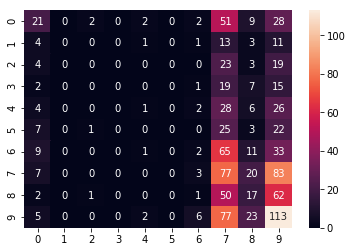

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix  

sns.heatmap(confusion_matrix(y_true = Y_test, y_pred = prediction3), annot = True, fmt="d")